# Plot TC track in ACE2
2025.1.23
Mu-Ting Chien

In [4]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.util as cartopy_util
import cartopy.crs as ccrs
from netCDF4 import Dataset
import os

In [5]:
DIR = '/barnes-engr-scratch1/c832572266/'
dir_in = DIR + 'data_output/ace2/ace2_tempex/StichNodes/'
expname_list = list(['ace2'])
#fig_dir_era5 = DIR + 'figure/era5_TC/'
#os.makedirs(fig_dir_era5, exist_ok=True)
file_dir_multi_yr = DIR + 'data_output/ace2/ace2_output/'

In [17]:
for first_time_execution in range(1,-1,-1):
    print(first_time_execution)
    for icase in range(0,1):
        expname = expname_list[icase]
        fig_dir = DIR + 'figure/ace2_fig/TC/'
        os.makedirs(fig_dir, exist_ok=True)

        # Name of the sub directory for the data named "filename"
        dir_sub_list = list(['yr1','yr2-5','yr6-10'])

        nsub = np.size(dir_sub_list)
        for imem in range(0, 1):
            mem_str = f"{imem+1:02d}"
            for isub in range(0, nsub): # which year to plot
                #yrname = f"{dir_sub_list[isub]:04d}"

                filename = 'tracks.ACE2.TC.01.'+dir_sub_list[isub]+'.from-slp.txt'

                # Define expected number of columns in your data rows
                expected_columns = 12  # Adjust this based on your actual data

                # Define a list to hold valid data rows
                data_rows = []

                # Read file line by line
                with open(dir_in + './from_slp/'+filename, "r") as file:
                    for line in file:
                        # Split the line by whitespace
                        columns = line.strip().split()
                        
                        # Check if the line matches the expected column count
                        if len(columns) == expected_columns:
                            try:
                                # Attempt to convert the first value to a float (filter out header rows)
                                float(columns[0])
                                data_rows.append(columns)  # Only append if it's not a header
                            except ValueError:
                                # Skip the line if the first item is not numeric (header row)
                                continue

                # Convert the filtered rows to a DataFrame
                data = pd.DataFrame(data_rows, dtype=float)


                # If you want to assign each column to a separate variable
                lon_TC, lat_TC, mslp, vmax, hsfc, vmax_10m = data[2], data[3], data[4], data[5], data[6], data[7]  # Adjust depending on the number of columns
                yr, mon, day, hr           = data[8], data[9], data[10], data[11]

                if isub == 0:
                    ist = 0
                    if first_time_execution == 1:
                        TC_snapshot = np.empty(nsub, dtype=int)
                TC_snapshot[isub] = np.size(lon_TC)
            
                # Save data
                # Note: the year information here all represents 2001 in reality
                np.savez(file_dir_multi_yr+'TC_ace2_2001-2010_'+dir_sub_list[isub]+'.from-slp.npz', lon_TC = lon_TC, lat_TC=lat_TC, mslp=mslp, vmax=vmax,\
                    vmax_10m=vmax_10m, hsfc=hsfc, yr=yr, mon=mon, day=day, hr=hr)
            
            ntc = np.sum(TC_snapshot)



1
0


In [18]:
print(np.min(hsfc), np.max(hsfc))

print(np.mean(hsfc))

-81.90107 1302.214
14.419652722107847


In [13]:
# Load normal lon and lat 
file = DIR + 'data_output/ace_forcing/HGTsfc.nc'
data = xr.open_dataset(file)
lon = data['lon']
lat = data['lat']

In [19]:
lon_TC_adj = np.where(lon_TC>180, -360+lon_TC, lon_TC)

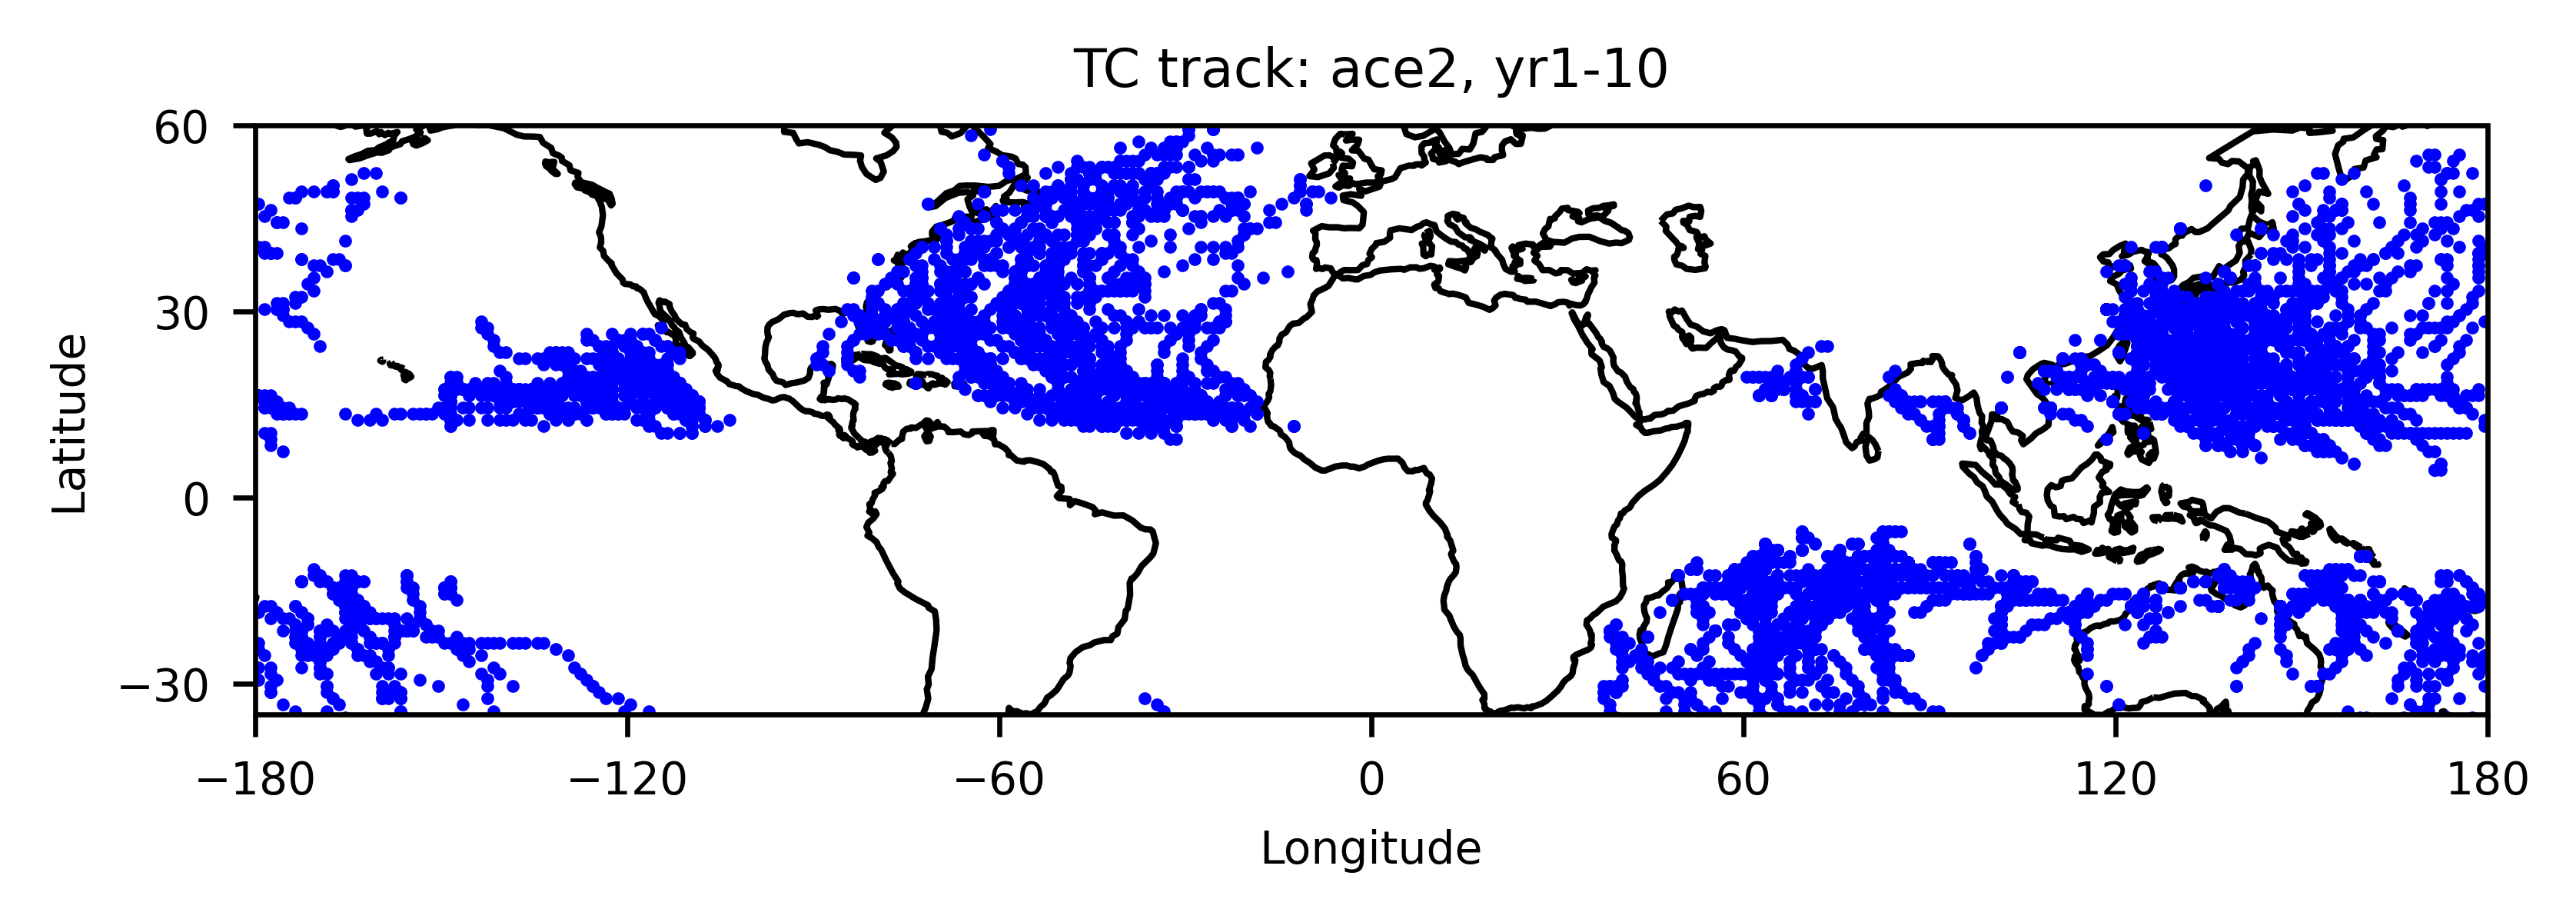

In [20]:
# Plot TC tracks
plot_TC_track = 1

if plot_TC_track == 1:

    fig_name = 'Fig.3_TCtrack_2001-2010_yr1-10.from_slp.png'
    fig, ax = plt.subplots(1,1,figsize=(5.5, 3.5),dpi=600, subplot_kw={'projection':ccrs.PlateCarree()} )
    plt.subplots_adjust(left=0.1, right=0.98,top=0.9,bottom=0.15,hspace=0.3, wspace=0.1)
    plt.rcParams.update({'font.size': 7})

    [xx, yy] = np.meshgrid(lon, lat)
    ax.coastlines()
    ax.set_xticks(np.arange(-180,240,60), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-30,120,30), crs=ccrs.PlateCarree())
    ax.set_ylim(np.array([-35, 60]))

    plt.plot(lon_TC_adj, lat_TC, 'bo', markersize=1)
    plt.title('TC track: '+expname+', yr1-10')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig(fig_dir+fig_name,format='png', dpi=600)
    plt.show()